In [1]:
import pandas as pd
import numpy as np 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv("wages.csv")

In [4]:
df

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43
...,...,...,...,...,...,...
1374,30173.380363,71.68,male,white,12,33
1375,24853.519514,61.31,female,white,18,86
1376,13710.671312,63.64,female,white,12,37
1377,95426.014410,71.65,male,white,12,54


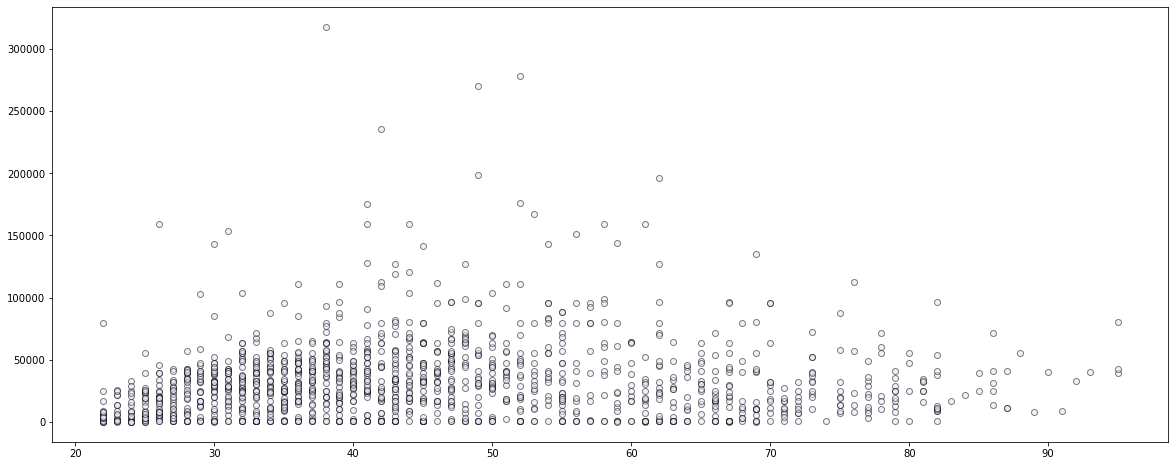

In [33]:
plt.figure(figsize=(20,8))
plt.scatter(df['age'],df['earn'],color='lavender',edgecolor='k',alpha=0.5)

plt.show()

<AxesSubplot:xlabel='race', ylabel='earn'>

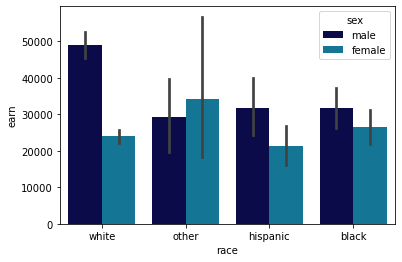

In [46]:
sns.barplot(x=df['race'],y=df['earn'],hue=df['sex'],palette='ocean')

In [51]:
X=df[['age']]

In [52]:
y=df['earn']

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=101)

In [54]:
lm=LinearRegression()

In [55]:
lm.fit(X_train,y_train)

LinearRegression()

In [61]:
prediction=lm.predict(X_test).reshape(414,1)
prediction.shape

(414, 1)

In [64]:
r2_score(y_test,prediction)

0.0023586391866763368

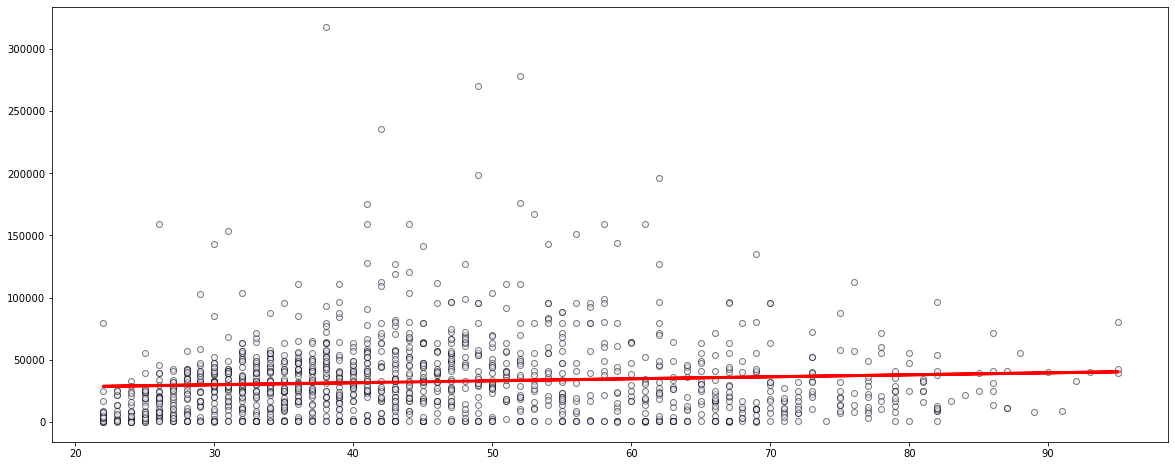

In [78]:
plt.figure(figsize=(20,8))
plt.scatter(df['age'],df['earn'],color='lavender',edgecolor='k',alpha=0.5)
plt.plot(X_train,lm.predict(X_train),'r',linewidth=3)
plt.show()


In [115]:
poly=PolynomialFeatures(degree=2)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.fit_transform(X_test)


In [116]:
lr=LinearRegression()

In [117]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [118]:
trans_prediction=lr.predict(X_test_trans)

In [119]:
r2_score(y_test,trans_prediction)

0.052604461734783725